<a href="https://colab.research.google.com/github/mvajhi/unsupervised-learning/blob/master/HW2/PCA_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [4]:
df = pd.read_csv("/content/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
data = df.to_numpy()
data

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [6]:
true_label = data[:,-1]
X = data[:,:-1]
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

## Standardization

برای این که تاثیر گذاری ستون های مختلف یکسان باشد آنها را استاندارد می کنیم البته می توانیم از این کار صرف نظر کنیم. در PCA انجام دادیم و در LDA صرف نظر کردیم.

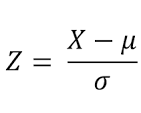

In [7]:
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
Z = (X - mean) / std
Z

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

# PCA

In [8]:
n_components = 2

## Covariance Matrix

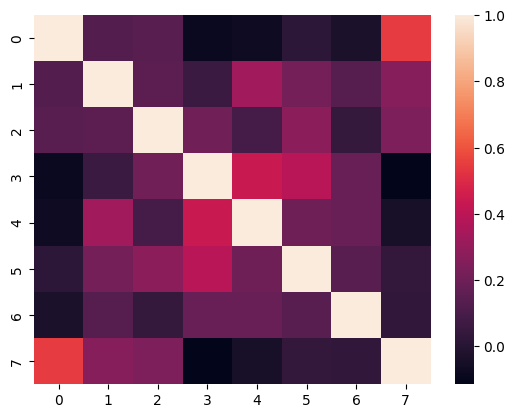

In [9]:
cov = np.cov(Z, rowvar=False)
sns.heatmap(cov);

## Calculate Eigenvalues & Eigenvectors

In [10]:
eigenvalues, eigenvectors = np.linalg.eig(cov)
(eigenvalues, eigenvectors)

(array([2.09711056, 1.73346726, 0.42036353, 0.40498938, 0.68351839,
        0.76333832, 0.87667054, 1.03097228]),
 array([[-0.1284321 , -0.59378583, -0.58879003,  0.11784098, -0.19359817,
          0.47560573, -0.08069115,  0.01308692],
        [-0.39308257, -0.17402908, -0.06015291,  0.45035526, -0.09416176,
         -0.46632804,  0.40432871, -0.46792282],
        [-0.36000261, -0.18389207, -0.19211793, -0.01129554,  0.6341159 ,
         -0.32795306, -0.05598649,  0.53549442],
        [-0.43982428,  0.33196534,  0.28221253,  0.5662838 , -0.00958944,
          0.48786206, -0.03797608,  0.2376738 ],
        [-0.43502617,  0.25078106, -0.13200992, -0.54862138,  0.27065061,
          0.34693481,  0.34994376, -0.33670893],
        [-0.45194134,  0.1009598 , -0.03536644, -0.34151764, -0.68537218,
         -0.25320376, -0.05364595,  0.36186463],
        [-0.27061144,  0.122069  , -0.08609107, -0.00825873,  0.08578409,
         -0.11981049, -0.8336801 , -0.43318905],
        [-0.19802707, -0.

In [11]:
sorted_i = np.argsort(eigenvalues)[::-1]
sorted_eigenvectors = eigenvectors[:, sorted_i]

print(sorted_i)

[0 1 7 6 5 4 2 3]


## Projection

[[-1.06850273 -1.23489499]
 [ 1.12168331  0.73385167]
 [ 0.39647671 -1.59587594]
 ...
 [ 0.28347525 -0.09706503]
 [ 1.06032431 -0.83706234]
 [ 0.83989172  1.15175485]]


,0,1
count,7.680000e+02,768.000000
mean,-2.382354e-16,0.000000
std,1.448140e+00,1.316612
min,-5.727155e+00,-3.664784
25%,-8.841278e-01,-0.963639
50%,1.187927e-01,0.281858
75%,9.685071e-01,1.034726
max,5.128234e+00,2.590059


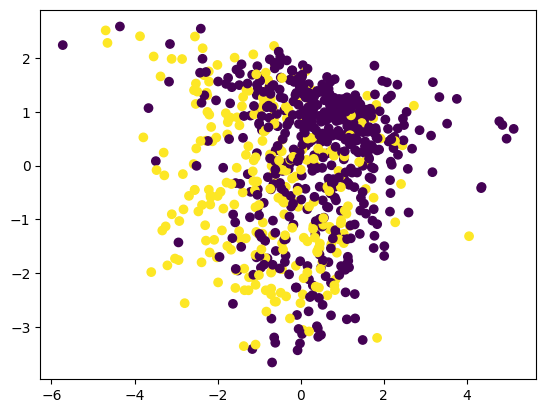

In [76]:
my_pca_Z = Z @ sorted_eigenvectors[:, :n_components]
print(my_pca_Z)
display(pd.DataFrame(my_pca_Z).describe())
display(plt.scatter(my_pca_Z[:,0],my_pca_Z[:,1], c=true_label))

## PCA lib

[[ 1.06850273  1.23489499]
 [-1.12168331 -0.73385167]
 [-0.39647671  1.59587594]
 ...
 [-0.28347525  0.09706503]
 [-1.06032431  0.83706234]
 [-0.83989172 -1.15175485]]


,0,1
count,7.680000e+02,7.680000e+02
mean,2.312965e-18,-4.625929e-18
std,1.448140e+00,1.316612e+00
min,-5.128234e+00,-2.590059e+00
25%,-9.685071e-01,-1.034726e+00
50%,-1.187927e-01,-2.818583e-01
75%,8.841278e-01,9.636387e-01
max,5.727155e+00,3.664784e+00


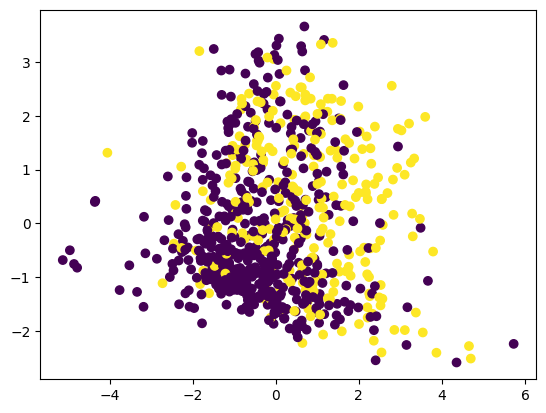

In [75]:
from sklearn.decomposition import PCA
pca_Z = PCA(n_components=n_components).fit_transform(Z)
print(pca_Z)
display(pd.DataFrame(pca_Z).describe())
display(plt.scatter(pca_Z[:,0],pca_Z[:,1], c=true_label))

همانطور که مشاهده می کنید نیتجه یکسان است فقط جهت آن متفاوت است یعنی انگار کل مقادیر در منفی یک ضرب شده اند. دلیل این موضوع این است که بردار ویژه راستا را مشخص می کند و جهت آن در نتیجه تفاوتی ایجاد نمی کند. باقی مقادیر یکسان هستند. تفاوت های جزیی هم می تواند به این علت باشد که کتابخانه مقادیر را با روش های عددی حساب می کند.

# LDA

## Calculate mean, scatter, S_B, S_W

In [39]:
c_0 = df[df['Outcome'] == 0].drop('Outcome', axis=1)
c_1 = df[df['Outcome'] == 1].drop('Outcome', axis=1)
c_1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
2,8,183,64,0,0,23.3,0.672,32
4,0,137,40,35,168,43.1,2.288,33
6,3,78,50,32,88,31.0,0.248,26
8,2,197,70,45,543,30.5,0.158,53
...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37
757,0,123,72,0,0,36.3,0.258,52
759,6,190,92,0,0,35.5,0.278,66
761,9,170,74,31,0,44.0,0.403,43


In [50]:
m_0 = c_0.mean().values
m_1 = c_1.mean().values
m_1

array([  4.86567164, 141.25746269,  70.82462687,  22.1641791 ,
       100.3358209 ,  35.14253731,   0.5505    ,  37.06716418])

In [51]:
S_0 = c_0.cov(ddof=0) * c_0.shape[0]
S_1 = c_1.cov(ddof=0) * c_1.shape[0]
S_1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,3737.164179,-1741.731343,2725.686567,-1398.089552,-1.088391e+04,-1154.068657,-25.737000,4875.417910
Glucose,-1741.731343,272377.235075,12591.100746,5671.671642,3.091258e+05,3122.764925,84.065500,9219.365672
BloodPressure,2725.686567,12591.100746,123326.757463,22851.716418,7.112178e+04,5582.699254,73.763500,16533.156716
SkinThickness,-1398.089552,5671.671642,22851.716418,83456.776119,2.988992e+05,10698.828358,481.432000,-4763.955224
Insulin,-10883.910448,309125.828358,71121.783582,298899.223881,5.135658e+06,14822.271642,1400.407000,9724.955224
BMI,-1154.068657,3122.764925,5582.699254,10698.828358,1.482227e+04,14084.435075,98.751300,-3998.965672
DiabetesPedigreeFunction,-25.737000,84.065500,73.763500,481.432000,1.400407e+03,98.751300,37.018979,-96.089000
Age,4875.417910,9219.365672,16533.156716,-4763.955224,9.724955e+03,-3998.965672,-96.089000,32120.791045


In [68]:
diff_m = (m_0 - m_1).reshape(-1,1)
S_B = diff_m @ diff_m.T
S_W = S_0 + S_1
S_W = S_W.values
display(S_B, S_W)

array([[2.45759438e+00, 4.90327913e+01, 4.13963585e+00, 3.91945988e+00,
        4.94503535e+01, 7.58492420e+00, 1.89321433e-01, 9.21346362e+00],
       [4.90327913e+01, 9.78279672e+02, 8.25921083e+01, 7.81992587e+01,
        9.86610681e+02, 1.51330915e+02, 3.77725406e+00, 1.83822783e+02],
       [4.13963585e+00, 8.25921083e+01, 6.97291024e+00, 6.60204011e+00,
        8.32954609e+01, 1.27762435e+01, 3.18897944e-01, 1.55193976e+01],
       [3.91945988e+00, 7.81992587e+01, 6.60204011e+00, 6.25089555e+00,
        7.88652019e+01, 1.20967099e+01, 3.01936630e-01, 1.46939631e+01],
       [4.94503535e+01, 9.86610681e+02, 8.32954609e+01, 7.88652019e+01,
        9.95012637e+02, 1.52619646e+02, 3.80942107e+00, 1.85388214e+02],
       [7.58492420e+00, 1.51330915e+02, 1.27762435e+01, 1.20967099e+01,
        1.52619646e+02, 2.34095080e+01, 5.84306644e-01, 2.84357027e+01],
       [1.89321433e-01, 3.77725406e+00, 3.18897944e-01, 3.01936630e-01,
        3.80942107e+00, 5.84306644e-01, 1.45844268e-02, 7.

array([[ 8.27976218e+03,  2.14224866e+03,  6.34527057e+03,
        -4.05102555e+03, -3.05299184e+04, -9.63094457e+02,
        -6.17383660e+01,  1.49371079e+04],
       [ 2.14224866e+03,  6.13375035e+05,  5.80179407e+04,
         8.78231164e+03,  7.64314748e+05,  1.63385069e+04,
         4.56836840e+02,  4.39232657e+04],
       [ 6.34527057e+03,  5.80179407e+04,  2.86137829e+05,
         4.79586284e+04,  1.37622920e+05,  3.07554129e+04,
         1.47335972e+02,  3.91116767e+04],
       [-4.05102555e+03,  8.78231164e+03,  4.79586284e+04,
         1.94090328e+05,  6.02125280e+05,  3.57591340e+04,
         6.92946312e+02, -1.89630352e+04],
       [-3.05299184e+04,  7.64314748e+05,  1.37622920e+05,
         6.02125280e+05,  1.00130561e+07,  1.11258608e+05,
         4.75547934e+03, -7.61752848e+04],
       [-9.63094457e+02,  1.63385069e+04,  3.07554129e+04,
         3.57591340e+04,  1.11258608e+05,  4.35922363e+04,
         1.79850059e+02, -2.38406467e+03],
       [-6.17383660e+01,  4.568368

## Calculate eigenvectors

In [69]:
A = np.linalg.inv(S_W) @ S_B
eigenvalues, eigenvectors = np.linalg.eig(A)
sorted_i = np.argsort(eigenvalues)[::-1]
w = eigenvectors[:, sorted_i[0]]
w

array([-0.13781396+0.j, -0.03962225+0.j,  0.01560642+0.j, -0.00103415+0.j,
        0.00120825+0.j, -0.08863752+0.j, -0.98540697+0.j, -0.01754404+0.j])

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


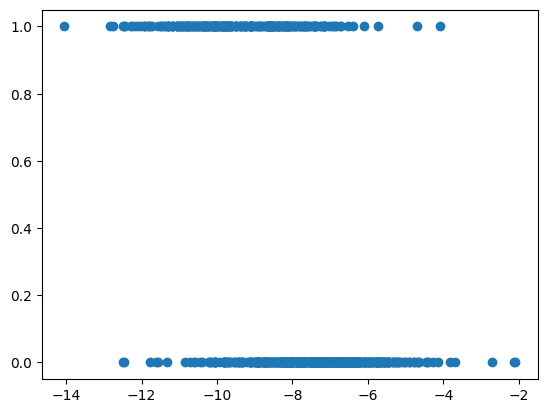

In [74]:
X_all = df.drop('Outcome', axis=1).values
my_lda_data = X_all @ w
plt.scatter(my_lda_data, true_label)

## LDA lib

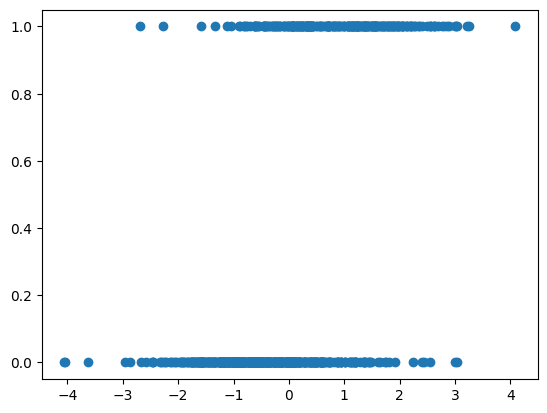

In [77]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_data = LinearDiscriminantAnalysis().fit_transform(X_all,true_label)
plt.scatter(lda_data, true_label)

همانطور که مشاهده می کنید به نظر می آیند نتایح مانند PCA یکسان هستند تنها قرینه هستند که علت آن در PCA گفته شد